### Child mind institute - Detect sleep states

* Threshold Analysis
* Sliding Windows

In [2]:
import pandas as pd
import os
import fnmatch
import pyarrow.parquet as pq
import matplotlib as plt
import numpy as np

In [3]:
#link to the google drive. Need to follow the authorization instructions.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Get the path to the data folder

data_files_path=[]
#Path for the accelerometer data
path = '/content/drive/My Drive/Leave/Kaggle/CMI Sleep/CMI Sleep Data'

#Go through all the files in a directory (probably includes subdirectoies as well?)
for file_name in os.listdir(path):
    if fnmatch.fnmatch(file_name,'*parquet'):
        data_files_path.append(os.path.join(path,file_name))

data_files_path_sorted=sorted(data_files_path)

#Print to make sure
for f in data_files_path_sorted:
    print(f)


/content/drive/My Drive/Leave/Kaggle/CMI Sleep/CMI Sleep Data/test_series.parquet
/content/drive/My Drive/Leave/Kaggle/CMI Sleep/CMI Sleep Data/train_series.parquet


### Reading parquet file by reading row group
* Read the first group of rows (first person)

In [5]:
parquet_file = pq.ParquetFile(data_files_path_sorted[1])
#chunk_size = 10000
first_row = 0
table = parquet_file.read_row_group(first_row)
chunk_df = table.to_pandas(split_blocks = True, self_destruct = True)

In [5]:
chunk_df.series_id.unique()

array(['038441c925bb'], dtype=object)

In [ ]:
chunk_df.head(20)
# the first 20 entries for the first person

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
5,038441c925bb,5,2018-08-14T15:30:25-0400,2.636700,0.0217
6,038441c925bb,6,2018-08-14T15:30:30-0400,2.636700,0.0217
7,038441c925bb,7,2018-08-14T15:30:35-0400,2.636700,0.0218
8,038441c925bb,8,2018-08-14T15:30:40-0400,2.798000,0.0223
9,038441c925bb,9,2018-08-14T15:30:45-0400,3.084700,0.0217


<Axes: >

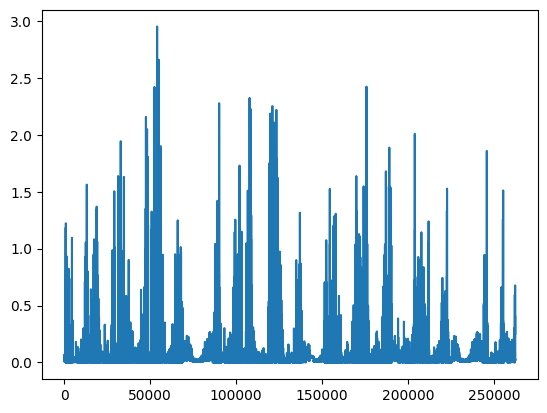

In [ ]:
# accelerometer data = enmo
chunk_df.enmo.plot()
# all accelerometer data for the first person
# should be ~23 sleeps, but not all were recorded in train_events, I'm only counting ~21 sleeps in plot

<Axes: >

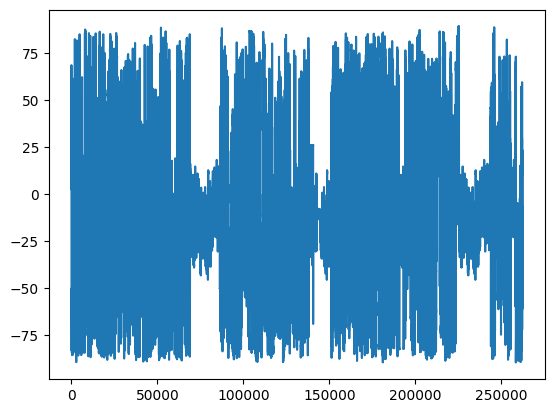

In [ ]:
# arm angle = anglez
chunk_df.anglez.plot()
# all angles of arm joint for the first person
# there are less clear variations in arm angle that align with sleep and awakeness

<Axes: >

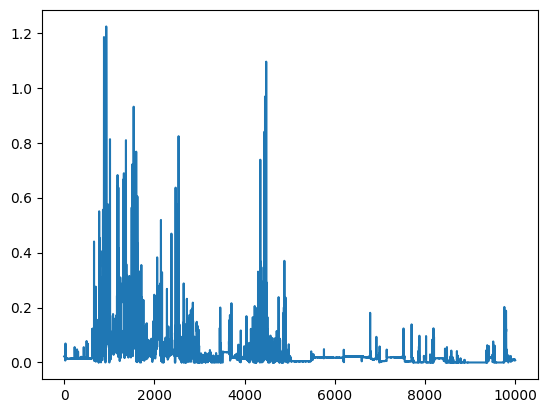

In [ ]:
chunk_df.enmo[0:10000].plot()
# what is this?

In [ ]:
# THIS LOOKS AT FIRST AND SECOND PERSON
second_row = 1
table_second = parquet_file.read_row_group(second_row)
chunk_df_second = table_second.to_pandas(split_blocks = True, self_destruct = True)

In [ ]:
chunk_df_second.series_id.unique()

array(['038441c925bb', '03d92c9f6f8a'], dtype=object)

<Axes: >

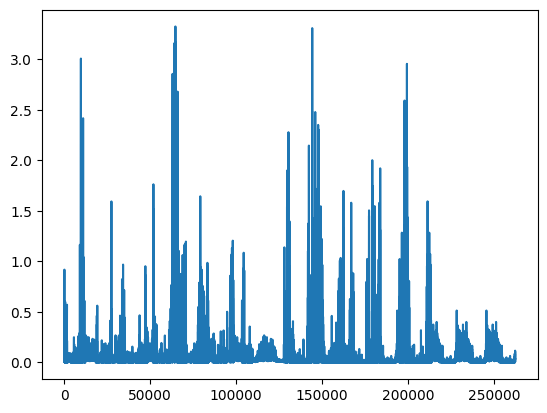

In [ ]:
chunk_df_second.enmo.plot()

# Rolling Windows
### Article: https://www.educative.io/answers/how-to-compute-the-rolling-mean-of-a-time-series-in-python

In [ ]:
chunk_df

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
262180,038441c925bb,262180,2018-08-29T19:38:20-0400,-12.797600,0.0622
262181,038441c925bb,262181,2018-08-29T19:38:25-0400,-39.450699,0.0595
262182,038441c925bb,262182,2018-08-29T19:38:30-0400,-52.246101,0.1025
262183,038441c925bb,262183,2018-08-29T19:38:35-0400,-60.832500,0.0696


# Rolling Windows
### Documentation: https://pandas.pydata.org/docs/user_guide/window.html

### Questions:
* 12 steps = 1 minute

In [6]:
# 15 minute window is 180 steps (180 rows in dataframe)
window_15 = 180
chunk_df.rolling(window_15).mean()

<ipython-input-6-5863236c1193>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['series_id', 'timestamp'], dtype='object')
  chunk_df.rolling(window_15).mean()


,step,anglez,enmo
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
262180,262090.5,-13.530308,0.060508
262181,262091.5,-13.507493,0.060586
262182,262092.5,-13.611155,0.060973
262183,262093.5,-13.779270,0.061027


In [7]:
# create a new column with the average accelerometer value for 15 min windows
chunk_df['mean_15min'] = chunk_df['enmo'].rolling(window_15).mean()

print(chunk_df.head(20))

       series_id  step                 timestamp     anglez    enmo  \
0   038441c925bb     0  2018-08-14T15:30:00-0400   2.636700  0.0217   
1   038441c925bb     1  2018-08-14T15:30:05-0400   2.636800  0.0215   
2   038441c925bb     2  2018-08-14T15:30:10-0400   2.637000  0.0216   
3   038441c925bb     3  2018-08-14T15:30:15-0400   2.636800  0.0213   
4   038441c925bb     4  2018-08-14T15:30:20-0400   2.636800  0.0215   
5   038441c925bb     5  2018-08-14T15:30:25-0400   2.636700  0.0217   
6   038441c925bb     6  2018-08-14T15:30:30-0400   2.636700  0.0217   
7   038441c925bb     7  2018-08-14T15:30:35-0400   2.636700  0.0218   
8   038441c925bb     8  2018-08-14T15:30:40-0400   2.798000  0.0223   
9   038441c925bb     9  2018-08-14T15:30:45-0400   3.084700  0.0217   
10  038441c925bb    10  2018-08-14T15:30:50-0400   2.780200  0.0229   
11  038441c925bb    11  2018-08-14T15:30:55-0400   2.520500  0.0216   
12  038441c925bb    12  2018-08-14T15:31:00-0400   2.412900  0.0218   
13  03

In [10]:
chunk_df

,series_id,step,timestamp,anglez,enmo,mean_15min
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,NaN
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,NaN
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,NaN
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,NaN
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,NaN
...,...,...,...,...,...,...
262180,038441c925bb,262180,2018-08-29T19:38:20-0400,-12.797600,0.0622,0.060508
262181,038441c925bb,262181,2018-08-29T19:38:25-0400,-39.450699,0.0595,0.060586
262182,038441c925bb,262182,2018-08-29T19:38:30-0400,-52.246101,0.1025,0.060973
262183,038441c925bb,262183,2018-08-29T19:38:35-0400,-60.832500,0.0696,0.061027


from matplotlib import pyplot as plt
chunk_df['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['anglez'].plot(kind='hist', bins=20, title='anglez')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['enmo'].plot(kind='hist', bins=20, title='enmo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['mean_15min'].plot(kind='hist', bins=20, title='mean_15min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df.plot(kind='scatter', x='step', y='anglez', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df.plot(kind='scatter', x='anglez', y='enmo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
chunk_df.plot(kind='scatter', x='enmo', y='mean_15min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['anglez']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chunk_df.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('anglez')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['enmo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chunk_df.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('enmo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['mean_15min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chunk_df.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('mean_15min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['step']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'step'}, axis=1)
              .sort_values('step', ascending=True))
  xs = counted['step']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chunk_df.sort_values('step', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
chunk_df['step'].plot(kind='line', figsize=(8, 4), title='step')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['anglez'].plot(kind='line', figsize=(8, 4), title='anglez')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['enmo'].plot(kind='line', figsize=(8, 4), title='enmo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
chunk_df['mean_15min'].plot(kind='line', figsize=(8, 4), title='mean_15min')
plt.gca().spines[['top', 'right']].set_visible(False)

# Threshold
### Analysis Ideas

#### Idea 1
* Create a larger rolling window over the existing windows and set arbitrary threshold where the mean values of the larger window is over then the person is awake
* The size of the larger rolling window could be ~30 min. because the person can be awake for 30 min. and fall back to sleep and the whole period is still considered sleep
* Based on exploratory data analysis, a possible threshold value could be ~0.4
* In the final solution, the threshold value could be decided upon using a machine learning algorithm

#### Idea 2
* Calculate the area under curve for all average enmo values > threshold value
* If the area is greater than a certain value, then the person is awake

#### Idea 3
* Look for consecutive values greater than threshold value
* If there are enough consecutive values, then the person is awake

<Axes: >

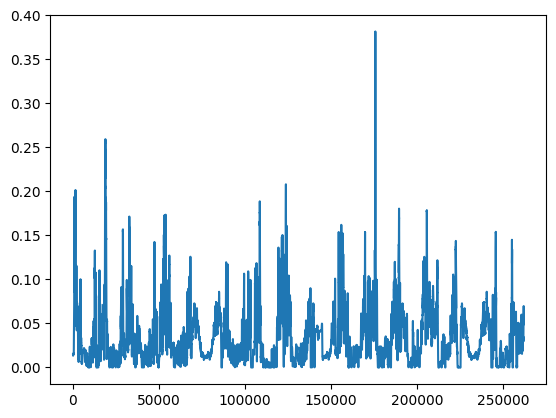

In [8]:
chunk_df.mean_15min.plot()
# the maximum acceleration is noticably much smaller now
# threshold should probably be ~0.075

In [ ]:
# Repeat of Idea 3
# Stack overflow: https://stackoverflow.com/questions/67718424/python-time-series-count-periods-below-above-and-threshold-for-specified-minim

# first is `mean_15min` column's threshold, other is minute threshold for `time`
enmo_threshold = 0.4
# 30 min. time window is the threshold
# 12*30 = 360 steps
time_threshold = 3

# groupby by consecutive `enmo_threshold`s
# use the enmo from the 15 min. windows
grouper = chunk_df.groupby(chunk_df.mean_15min.le(enmo_threshold).diff().ne(0).cumsum())

# look at the time difference between last and first timestamp
# also ensure no `enmo` value exceeds the enmo_threshold
condition = lambda gr: (gr.mean_15min.max() <= enmo_threshold
                        and gr.step.iloc[-1] - gr.step.iloc[0] > pd.Timedelta(f"{time_threshold} steps"))

# filter the grouper and get the length
result = len([g for _, g in grouper if condition(g)])

Another Idea: Use a DFA where the stored state is in sleep or not in sleep. So we switch to awake state when mean enmo is above threshold and switch to sleep state when mean enmo is below threshold

Articles with ideas: https://blog.devgenius.io/finite-automata-implement-a-dfa-in-python-64dc3d7005d9, https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8, https://stackoverflow.com/questions/42193173/designing-and-implementing-a-dfa-in-python

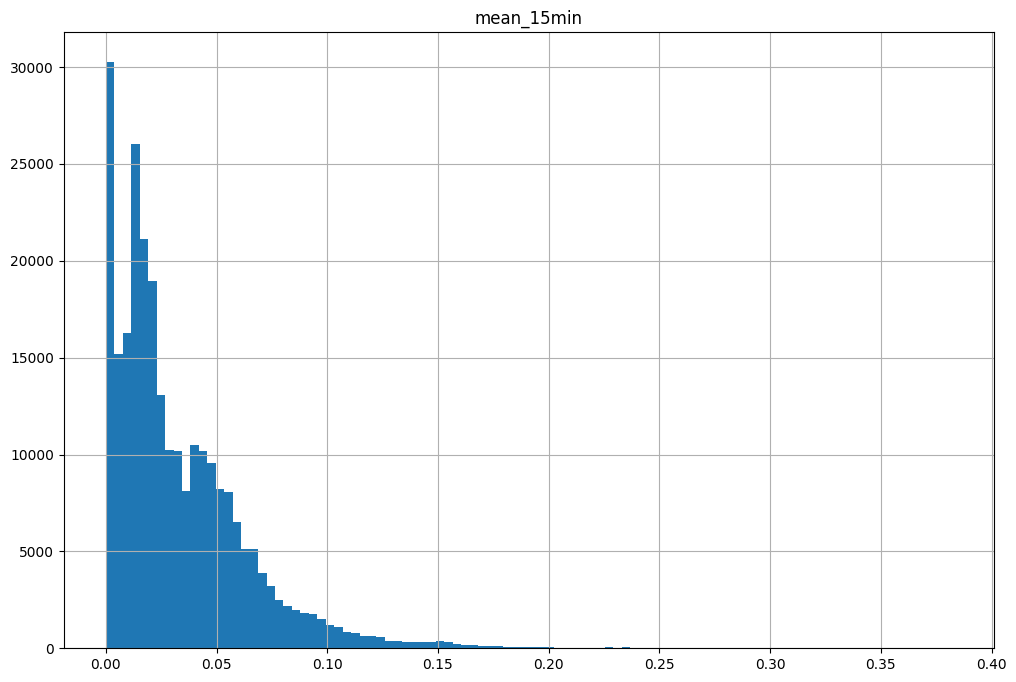

In [16]:
# create a histogram of window accelerometer values to determine threshold between awake and sleep state

# trying to find a bimodal distribution
hist = chunk_df.hist(column = "mean_15min", figsize=[12, 8], bins = 100)

# there are 3 spikes determined with 100 bins: 0, 0.016, 0.044
# potential threshold could be 0.04 for windows of 15 minutes

Reference: https://stackoverflow.com/questions/75315115/how-do-i-identify-and-extract-events-from-a-time-series-dataframe

In [17]:
enmo_15min_threshold = 0.04
awake_events_arr = chunk_df['mean_15min'].gt(enmo_15min_threshold)
chunk_df['awake_events'] = awake_events_arr.ne(awake_events_arr.shift(1)) & awake_events_arr

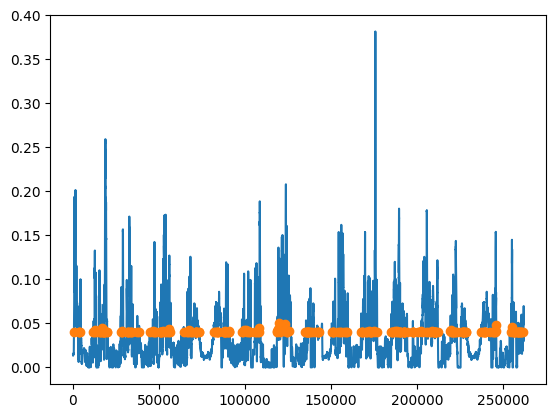

In [19]:
# chunk_df.mean_15min.plot()
plt.pyplot.plot(chunk_df.step, chunk_df.mean_15min)
plt.pyplot.plot(chunk_df.loc[chunk_df.awake_events,'step'],chunk_df.loc[chunk_df.awake_events,'mean_15min'],'o')

### Try with smaller window of 5 minutes

In [20]:
# 5 minute window is 60 steps (60 rows in dataframe)
window_5 = 60

# create a new column with the average accelerometer value for 5 min windows
chunk_df['mean_5min'] = chunk_df['enmo'].rolling(window_5).mean()

print(chunk_df.head(20))

       series_id  step                 timestamp     anglez    enmo  \
0   038441c925bb     0  2018-08-14T15:30:00-0400   2.636700  0.0217   
1   038441c925bb     1  2018-08-14T15:30:05-0400   2.636800  0.0215   
2   038441c925bb     2  2018-08-14T15:30:10-0400   2.637000  0.0216   
3   038441c925bb     3  2018-08-14T15:30:15-0400   2.636800  0.0213   
4   038441c925bb     4  2018-08-14T15:30:20-0400   2.636800  0.0215   
5   038441c925bb     5  2018-08-14T15:30:25-0400   2.636700  0.0217   
6   038441c925bb     6  2018-08-14T15:30:30-0400   2.636700  0.0217   
7   038441c925bb     7  2018-08-14T15:30:35-0400   2.636700  0.0218   
8   038441c925bb     8  2018-08-14T15:30:40-0400   2.798000  0.0223   
9   038441c925bb     9  2018-08-14T15:30:45-0400   3.084700  0.0217   
10  038441c925bb    10  2018-08-14T15:30:50-0400   2.780200  0.0229   
11  038441c925bb    11  2018-08-14T15:30:55-0400   2.520500  0.0216   
12  038441c925bb    12  2018-08-14T15:31:00-0400   2.412900  0.0218   
13  03

<Axes: >

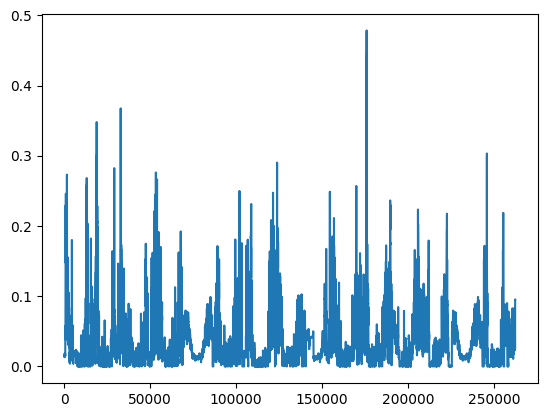

In [21]:
chunk_df.mean_5min.plot()
# threshold should probably be

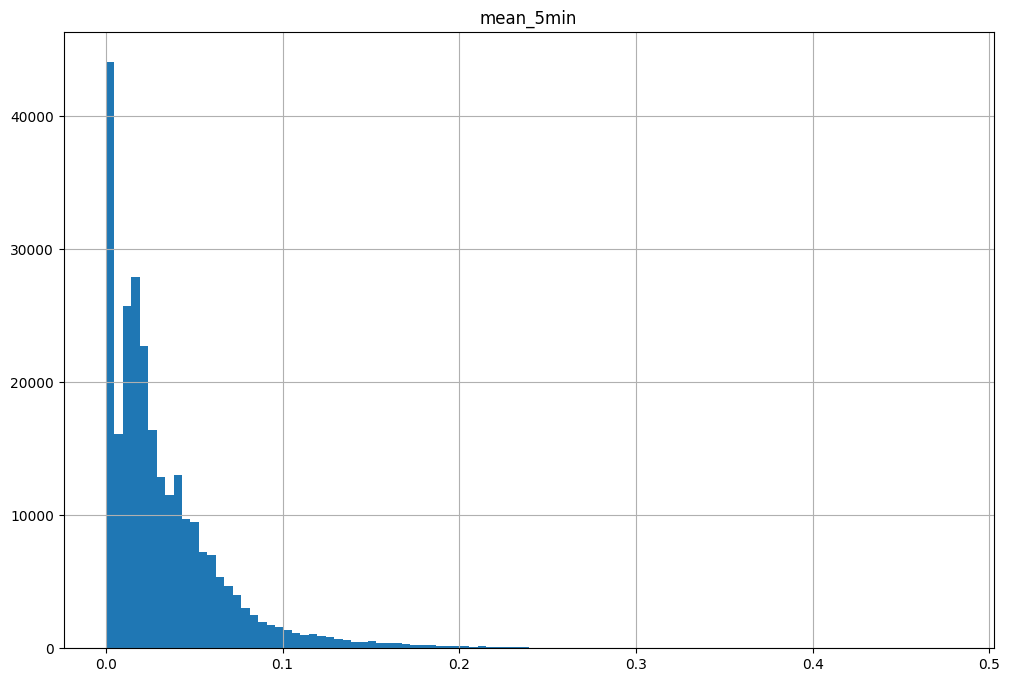

In [22]:
# create a histogram of window accelerometer values to determine threshold between awake and sleep state

# trying to find a bimodal distribution
hist = chunk_df.hist(column = "mean_5min", figsize=[12, 8], bins = 100)

# there are 3 spikes: 0, 0.019, 0.0429
# threshold is approximately 0.04 like previous analysis

In [26]:
enmo_5min_threshold = 0.0428
awake_events_arr_5min = chunk_df['mean_5min'].gt(enmo_5min_threshold)
chunk_df['awake_events_5min'] = awake_events_arr_5min.ne(awake_events_arr_5min.shift(1)) & awake_events_arr_5min

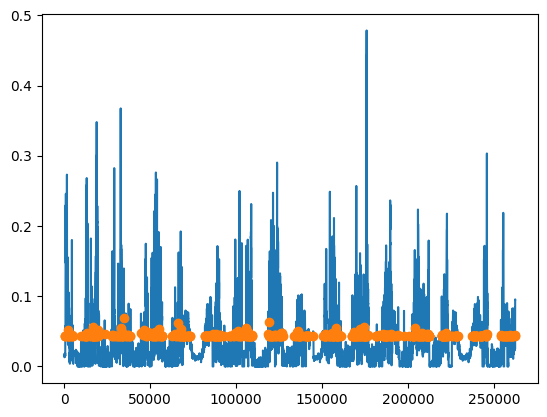

In [27]:
plt.pyplot.plot(chunk_df.step, chunk_df.mean_5min)
plt.pyplot.plot(chunk_df.loc[chunk_df.awake_events_5min,'step'],chunk_df.loc[chunk_df.awake_events_5min,'mean_5min'],'o')

## Test with a higher threshold value

In [28]:
enmo_5min_high_threshold = 0.06
awake_events_arr_5min_high = chunk_df['mean_5min'].gt(enmo_5min_high_threshold)
chunk_df['awake_events_5min_high'] = awake_events_arr_5min_high.ne(awake_events_arr_5min_high.shift(1)) & awake_events_arr_5min_high

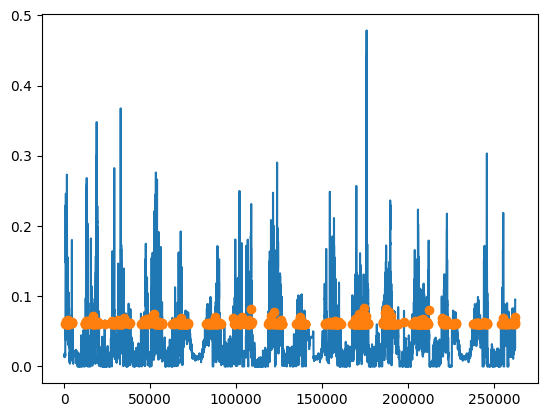

In [29]:
plt.pyplot.plot(chunk_df.step, chunk_df.mean_5min)
plt.pyplot.plot(chunk_df.loc[chunk_df.awake_events_5min_high,'step'],chunk_df.loc[chunk_df.awake_events_5min_high,'mean_5min'],'o')

# getting a large number of hits, which is more than the number of sleep cycles

Idea could be to only take the hits that are a minimum time period away from each other so we don't get lots of small sleep cycles in one big sleep cycle